In [57]:
set.seed(190903)
invisible(Sys.setlocale(locale="lithuanian"))
options(repr.plot.width=8, repr.plot.height=4)

# <center> Labor. darbas (1) </center>

---

# Ⅰ

In [58]:
N = 100
a = .5
b = .4

x.min = 0
x.max = 3
e.mean = 0
e.sd = .2

In [59]:
x = runif(N, min = x.min, max = x.max)   # x(1), ..., x(N)
e = rnorm(N, mean = e.mean, sd = e.sd)   # e(1), ..., e(N)

# Show result
head(x)
summary(x)
head(e)
summary(e)

[1] 1.30342110 0.85345317 0.03367131 1.88246941 0.51515894 0.14621693

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03367 0.85290 1.39205 1.47289 2.18162 2.99996 

[1]  0.099347585  0.003717981 -0.155483653 -0.114958445  0.081238413
[6] -0.210270291

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.551434 -0.151756 -0.022051 -0.001111  0.137645  0.555294 

# ①

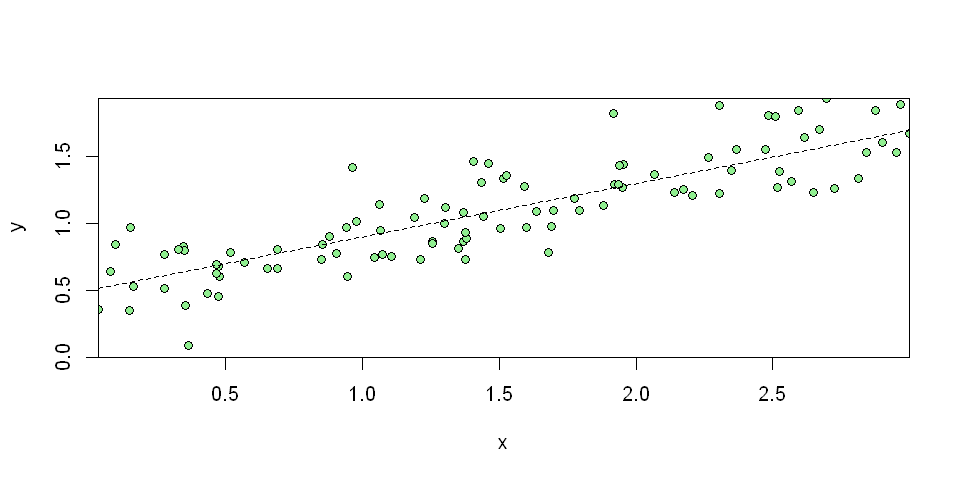

In [60]:
y = a + b * x + e

# Show result
plot(x, y, ylim=c(0, max(y)), yaxs="i", xaxs="i", pch=21, bg="lightgreen")
abline(a=a, b=b, lty=2)

# ②

## MKM metodo implementavimas

MKM tiesinį modeliavimą įvertinsime su šiais duomenų rinkiniais

$$y = 0 + 1x$$

x|y
-|-
1|1
2|2
3|3

---

$$y = 1 + 2x$$

x|y
-|-
1|3
2|5
3|7

##### Netinkama MKM implementacija

In [61]:
fit_linear_model = function(x, y) {
    stopifnot(length(x) == length(y))
    n = length(x)
    
    b = cov(x,y) / (mean(x^2) - mean(x))
    a = mean(y) - b * mean(x)

    return(data.frame(a=a, b=b))
}
#stopifnot(fit_linear_model(c(1,2,3), c(1,2,3)) == c(a=0, b=1))
#stopifnot(fit_linear_model(c(1,2,3), c(3,5,7)) == c(a=1, b=2))
fit_linear_model(c(1,2,3), c(1,2,3))

a,b
1.25,0.375


Metodas netinkamas, turėjome gauti $a=0$ ir $b=1$.

##### MKM implementacija

In [62]:
fit_linear_model = function(x, y) {
    stopifnot(length(x) == length(y))
    n = length(x)
    
    b = (n * sum(x*y) - sum(x) * sum(y)) / (n * sum(x^2) - sum(x)^2)
    a = (sum(y) - b * sum(x)) / n

    return(data.frame(a=a, b=b))
}
stopifnot(fit_linear_model(c(1,2,3), c(1,2,3)) == data.frame(a=0, b=1))
stopifnot(fit_linear_model(c(1,2,3), c(3,5,7)) == data.frame(a=1, b=2))

Implementacija tinkama.

## Modeliavimas

Tikrosios reikšmės:

a,b
0.5,0.4


Rastos reiškmės:

a,b
0.4844753,0.4097861


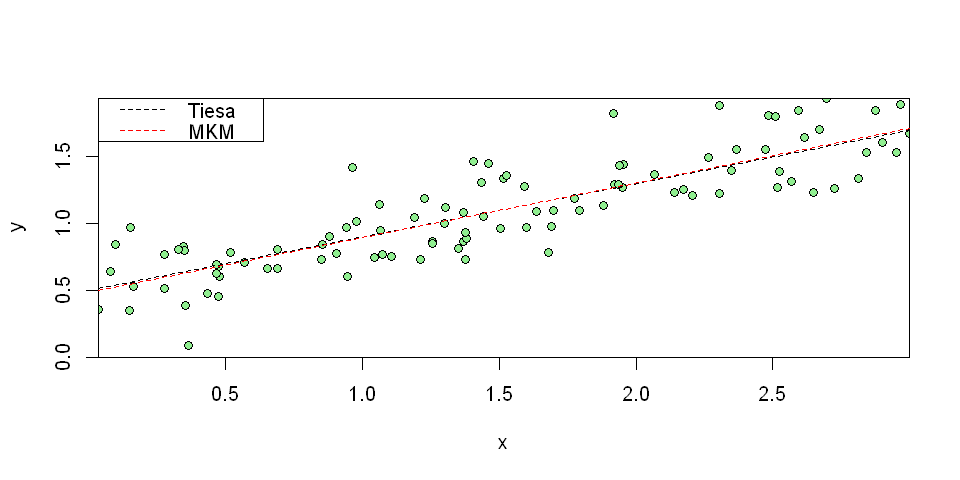

In [63]:
model = fit_linear_model(x,y)

cat("Tikrosios reikšmės:")
data.frame(a=a, b=b)
cat("Rastos reiškmės:")
model

# Show result
plot(x, y, ylim=c(0, max(y)), yaxs="i", xaxs="i", pch=21, bg="lightgreen")
abline(a=a, b=b, lty=2)
abline(a = model$a, b = model$b, col="red", lty=2)
legend("topleft", lty = c(2, NA, 2), col=c(1, NA, 2),
       legend = c("Tiesa", NA, "MKM"))

## Klausimai

#### Kiek $\hat{a}$ ir $\hat{b}$ skiriasi nuo $a$ ir $b$ ?
Rasime absoliutų skirtumą:

In [64]:
data.frame(a=abs(model$a - a), b=abs(model$b - b))

a,b
0.01552475,0.009786074


#### Kaip skirtumas ($\hat{a}$ ir $\hat{b}$  nuo tikrųjų $a$ ir $b$ reikšmių) priklauso nuo paklaidų taisyklės?
MKM tuo tiksliau ras tikrąsias $a$ ir $b$ reikšmes, kuo paklaidų taisyklės tikimybinis pasiskirstymo tankis bus simetriškesnis.

---

# Ⅱ

In [65]:
N = 100
a = c(3, 0)
b = c(-1, 1)
x.min = 0
x.max = 3
z.prob = .4
e.mean = 0
e.sd = .2

In [66]:
get_dataset = function(n) {
    x = runif(N, min = x.min, max = x.max)
    z = 1 + rbinom(N, size = 1, prob = z.prob)
    e = rnorm(N, mean = e.mean, sd = e.sd)
    y = NA
    y[z==1] = a[1] + b[1] * x[z==1] + e[z==1]
    y[z==2] = a[2] + b[2] * x[z==2] + e[z==2]
    return(data.frame(x=x, y=y, z=z))
}

D = get_dataset(N)

# Show result
head(D)
summary(D)

x,y,z
0.9083840,2.2941586,1
0.2603408,2.7573650,1
0.5256296,2.3389924,1
2.5861804,0.4156146,1
1.2324869,1.7841307,1
1.0162348,1.4002507,2


       x                y                 z       
 Min.   :0.0362   Min.   :-0.1960   Min.   :1.00  
 1st Qu.:0.8252   1st Qu.: 0.7564   1st Qu.:1.00  
 Median :1.5010   Median : 1.5424   Median :1.00  
 Mean   :1.5656   Mean   : 1.5736   Mean   :1.43  
 3rd Qu.:2.4468   3rd Qu.: 2.3540   3rd Qu.:2.00  
 Max.   :2.9753   Max.   : 3.2256   Max.   :2.00  

## Ką šis modelis galėtų modeliuoti?
Duotas modelis modeliuoja taškus kurių kiekvienas pasiskirstęs aplink vieną iš dviejų tiesių.

## Rasti $\hat{a_1}, \hat{a_2}, \hat{b_1}, \hat{b_2}$

Tikrosios reikšmės:

a1,a2,b1,b2
3,0,-1,1


Rastos reiškmės:

a1.est,a2.est,b1.est,b2.est
2.995158,0.01540307,-0.9940737,1.015941


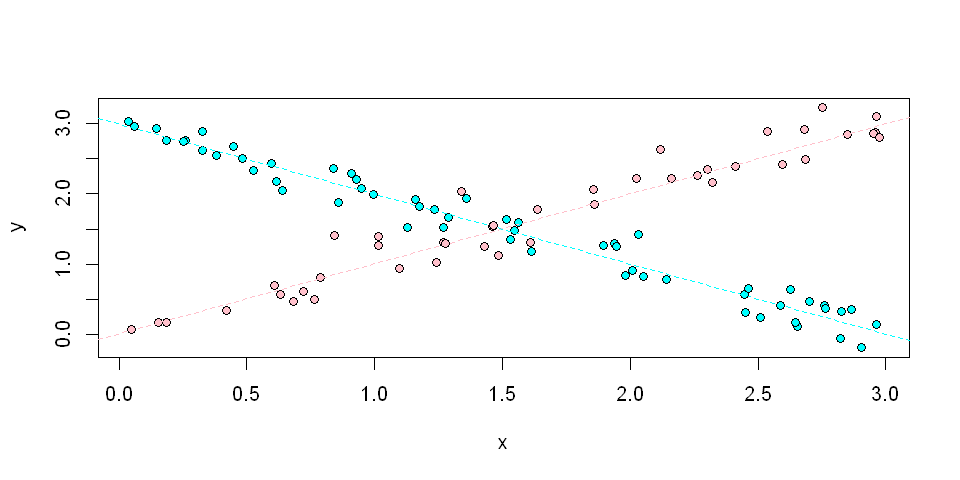

In [67]:
D1 = D[D$z==1,]
model1 = fit_linear_model(D1$x, D1$y)

D2 = D[D$z==2,]
model2 = fit_linear_model(D2$x, D2$y)


cat("Tikrosios reikšmės:")
data.frame(a1=a[1], a2=a[2], 
           b1=b[1], b2=b[2])
cat("Rastos reiškmės:")
data.frame(a1.est=model1$a, a2.est=model2$a, 
           b1.est=model1$b, b2.est=model2$b)

# Show result
plot(D1$x, D1$y, pch=21, bg="cyan", xlab='x', ylab='y', xlim=range(D$x), ylim=range(D$y))
abline(a=a[1], b=b[1], col="cyan", lty=2)
points(D2$x, D2$y, pch=21, bg="pink", xlab='x', ylab='y')
abline(a=a[2], b=b[2], col="pink", lty=2)

## Rasti $\hat{a}, \hat{b}$

Rasime a, b reikšmes visam duomenų rinkiniui prieš tai pakeitę paslinkę antrosios duomenų rinkinio dalies taškus (Keisime $\{x_2\}$ ir $\{y_2\}$ reikšmes)

In [130]:
fit_and_plot_with_shift = function(x.shift, y.shift) {
    D[D$z==2,]$x = D[D$z==2,]$x + x.shift
    D[D$z==2,]$y = D[D$z==2,]$y + y.shift
    
    model = fit_linear_model(D$x, D$y)
    cat('a =', model$a, '\nb = ', model$b)
    
    
    # Show result
    D1 = D[D$z==1,]
    model1 = fit_linear_model(D1$x, D1$y)
    D2 = D[D$z==2,]
    model2 = fit_linear_model(D2$x, D2$y)
    
    plot(D1$x, D1$y, pch=21, bg="cyan", xlab='x', ylab='y', xlim=range(D$x), ylim=range(D$y))
    abline(a=a[1], b=b[1], col="cyan", lty=2)
    points(D2$x, D2$y, pch=21, bg="pink", xlab='x', ylab='y')
    abline(a=a[2] - x.shift + y.shift, b=b[2], col="pink", lty=2)
    abline(a=model$a, b=model$b, col="darkgray", lty=2)
}

a = 1.851328 
b =  -0.1774188

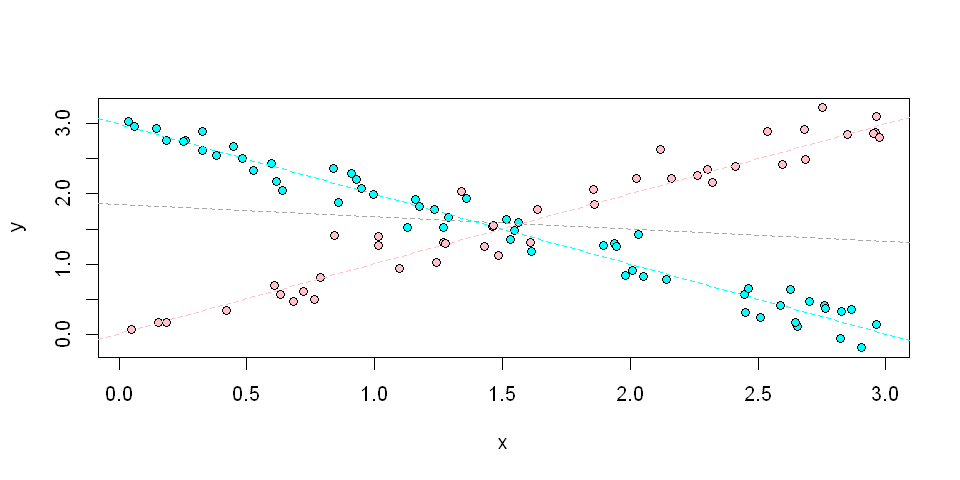

In [133]:
fit_and_plot_with_shift(x.shift=0, y.shift=0)

a = 0.9422716 
b =  0.4634492

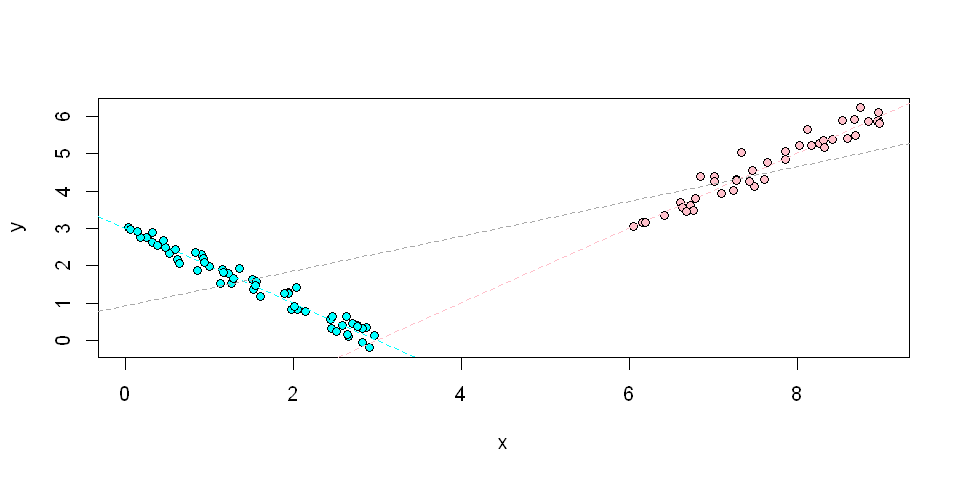

In [134]:
fit_and_plot_with_shift(x.shift=6, y.shift=3)

## Į ką artės $\hat{a}$ ir $\hat{b}$, kai $\{x_2\} \rightarrow \infty$, $\{x_1\} \rightarrow -\infty$ ?
$$\{\hat{a}\} \rightarrow \bar{x}$$
$$\{\hat{b}\} \rightarrow 0$$